# Snapchat Political Ads
This project uses political ads data from Snapchat, a popular social media app. Interesting questions to consider include:
- What are the most prevalent organizations, advertisers, and ballot candidates in the data? Do you recognize any?
- What are the characteristics of ads with a large reach, i.e., many views? What may a campaign consider when maximizing an ad's reach?
- What are the characteristics of ads with a smaller reach, i.e., less views? Aside from funding constraints, why might a campaign want to produce an ad with a smaller but more targeted reach?
- What are the characteristics of the most expensive ads? If a campaign is limited on advertising funds, what type of ad may the campaign consider?
- What groups or regions are targeted frequently? (For example, for single-gender campaigns, are men or women targeted more frequently?) What groups or regions are targeted less frequently? Why? Does this depend on the type of campaign?
- Have the characteristics of ads changed over time (e.g. over the past year)?
- When is the most common local time of day for an ad's start date? What about the most common day of week? (Make sure to account for time zones for both questions.)

### Getting the Data
The data and its corresponding data dictionary is downloadable [here](https://www.snap.com/en-US/political-ads/). Download both the 2018 CSV and the 2019 CSV. 

The CSVs have the same filename; rename the CSVs as needed.

Note that the CSVs have the exact same columns and the exact same data dictionaries (`readme.txt`).

### Cleaning and EDA
- Concatenate the 2018 CSV and the 2019 CSV into one DataFrame so that we have data from both years.
- Clean the data.
    - Convert `StartDate` and `EndDate` into datetime. Make sure the datetimes are in the correct time zone. You can use whatever timezone (e.g. UTC) you want as long as you are consistent. However, if you want to answer a question like "When is the most common local time of day for an ad's start date," you will need to convert timezones as needed. See Hint 2 below for more information.
- Understand the data in ways relevant to your question using univariate and bivariate analysis of the data as well as aggregations.

*Hint 1: What is the "Z" at the end of each timestamp?*

*Hint 2: `pd.to_datetime` will be useful here. `Series.dt.tz_convert` will be useful if a change in time zone is needed.*

*Tip: To visualize geospatial data, consider [Folium](https://python-visualization.github.io/folium/) or another geospatial plotting library.*

### Assessment of Missingness
Many columns which have `NaN` values may not actually have missing data. How come? In some cases, a null or empty value corresponds to an actual, meaningful value. For example, `readme.txt` states the following about `Gender`:

>  Gender - Gender targeting criteria used in the Ad. If empty, then it is targeting all genders

In this scenario, an empty `Gender` value (which is read in as `NaN` in pandas) corresponds to "all genders".

- Refer to the data dictionary to determine which columns do **not** belong to the scenario above. Assess the missingness of one of these columns.

### Hypothesis Test / Permutation Test
Find a hypothesis test or permutation test to perform. You can use the questions at the top of the notebook for inspiration.

# Summary of Findings

### Introduction
TODO

### Cleaning and EDA
TODO

### Assessment of Missingness
We first identified columns with missing data according to the data dictionary. We found that EndDate, CandidateBallotInformation, and CreativeProperties were the columns with missing data. To clarify, we concluded that CandidateBallotInformation had missing data because the data dictionary didn’t specifically state that missing values represented the absence of a candidate promoted by the ad. To further support this conclusion, we found ads where Warren for President was listed as the paying advertiser and CreativeProperties linked to Warren’s campaign website but Warren wasn’t listed under CandidateBallotInformation.  

We believe EndDate is NMAR because campaigns without a specified end date are less likely to report it and missing values don’t have a specified meaning in the data dictionary. To make this data MAR, we would like to collect data on whether the campaign is intended to run indefinitely. To further support this assumption, we are using our hypothesis tests later in the project to determine if there are any defining characteristics of campaigns without an end date.
We believe CandidateBallotInformation is not NMAR because the missingness can be explained by the ad not supporting a particular candidate or ballot initiative.   

We believe CreativeProperties is not NMAR because having a URL isn’t dependent on the content of the URL.
For our missingness assessment, we focused on CandidateBallotInformation and the type of missingness in it to help address our first identified question: is CandidateBallotInfomation being empty a random occurrence or is it a direct attempt to hinder transparency?  

We started by looking at some basic summary statistics for each column when CandidateBallotInformation was missing compared to the whole dataset. We identified Currency Code and Spend as columns we wanted to test CandidateBallotInformation’s dependency on.  Through our initial analysis, we do not think that CandidateBallotInformation is MD because there was no way to predict when the values were missing using other columns of the dataset.   

Using a permutation test, we compared the distributions of Null and Non-Null values for CandidateBallotInformation on Currency Code. Our null hypothesis is that the two distributions of Currency Code are approximately equal and the alternative hypothesis is that the two distributions are significantly different. Our test statistic was total variation distance. The p-value for the permutation test was 0.0 and with a significance level of 0.05, we can reject the null hypothesis. Therefore, the two distributions are different, meaning that the missingness of CandidateBallotInformation is MAR dependent on the distribution of Currency Code. Upon a further look into the results of the test, we found that when CandidateBallotInformation is missing, the proportion of USD currency codes is higher, thus causing the greater total variation distance. We can say that there is a relationship between missing CandidateBallotInformation and campaigns that pay in USD that would be worth further exploring with more rigorous testing.  

Using a permutation test, we compared the distributions of Null and Non-Null values for CandidateBallotInformation to the distribution of Null and Non-Null values of Radius Targeting (Included). Our null hypothesis is that the two distributions are approximately equal and the alternative hypothesis is that the two distributions are significantly different. Our test statistic was total variation distance. The p-value for the permutation test was 0.36 and with a significance level of 0.05, we can’t reject the null hypothesis. Therefore, the two distributions aren’t different, meaning that the missingness of CandidateBallotInformation isn’t MAR on the distribution of Null and Non-Null values of Radius Targeting (Included).   

This assessment helped us answer our first question. We determined that CandidateBallotInformation is not missing at random and the missingness of CandidateBallotInformation is in fact dependent on Currency Code. 


### Hypothesis Test
We made hypothesis tests to help us answer our earlier question: what are the defining characteristics of ads that don’t have a specified end date?  

First hypothesis test:  
We wanted to see if there was any difference between the average spend for campaigns where the end date is missing compared to the average spend for all campaigns. To limit variables in our test, we only looked at campaigns that were paid in USD.  

The null hypothesis: for campaigns that are paid in USD, the average spend of campaigns where the end date is missing is approximately equal to the average spend for all campaigns.  
The alternative hypothesis: for campaigns that are paid in USD, the average spend of campaigns where the end date is missing is lower than the average spend for all campaigns.  

Our test statistic was the mean and our p-value was 0.0. With a standard significance level of 0.05, we can reject the null hypothesis. We didn’t use the KS-Statistic because with the mean test statistic, we could already tell that the distributions were different from each other. By rejecting the null hypothesis, we came to the conclusion that the average spend of campaigns where the end date is missing is lower than the average spend for all campaigns.   

Second hypothesis test:  
We wanted to see if there was any difference between the distribution of specified gender-targeted campaigns where the campaign end date is missing compared to the distribution of specified gender-targeted campaigns for all campaigns. As specified by the data dictionary, we considered campaigns where the targeted gender is null to be a category of its own since it refers to campaigns that included all genders.  

The null hypothesis: the total variation distance of genders where the campaign end date is missing is approximately equal to the total variation distance of genders for all campaigns.  
The alternate hypothesis:the total variation distance of genders where the campaign end date is missing is greater compared to the total variation distance of genders for all campaigns.  

We did a permutation test using the distribution of proportions for ads targeting each gender category. Our test statistic was total variation distance and our p value is 0.0. With a standard significance level of 0.05, we can reject the null hypothesis. By rejecting the null hypothesis, we came to the conclusion that the distribution of genders where the campaign end date is missing is more varied compared to the distribution of genders for all campaigns.  

These hypothesis tests helped us answer our second question. Ads with missing end date values spend less on their campaign and have greater total variation distance in their gender-targeting distribution. 


# Code

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # Higher resolution figures

# hello, the age of robots is upon us. prepare for tyranny

# reading in data sets
ads_2018 = os.path.join('PoliticalAds2018.csv')
ads18 = pd.read_csv(ads_2018)
ads_2019 = os.path.join('PoliticalAds2019.csv')
ads19 = pd.read_csv(ads_2019)

# concat the data sets
ads = pd.concat([ads18, ads19], ignore_index=True)

# convert Start and End dates to date time objects + to PST
ads['StartDate'] = pd.to_datetime(ads['StartDate']).dt.tz_convert(tz="America/Los_Angeles")
ads['EndDate'] = pd.to_datetime(ads['EndDate']).dt.tz_convert(tz="America/Los_Angeles")


# Ad payments - Max bid (as many impressions as possible), Auto bid (sc sets on your behalf), 
# Target bid (Provide a target number of impressions)

# Distribution of genders (Only MALE, FEMALE, NaN)
ads[ads['Gender'].notna()]['Gender'].value_counts()

# Does the currency code match target zip codes?
# Take into consideration how much they spend
# UPDATE -- Foreign Ads aren't allowed per sc policy
ads['Currency Code']

# Most expensive ad (in USD) -- also the most viewed sc ad
ads[ads['Currency Code'] == 'USD']['Spend'].idxmax()
ads.iloc[4051]['CreativeProperties']
ads['Impressions'].idxmax() == 4051

# Organization with most campaigns (pro-choice org is #1)
ads['OrganizationName'].value_counts()

# Most Views by Organization
ads.groupby('OrganizationName')['Impressions'].sum().sort_values(ascending=False)
# Average Views by Organization (Hawkfish LLC #2 -- Bloomberg Shills)
ads.groupby('OrganizationName')['Impressions'].mean().sort_values(ascending=False)
ads[ads['OrganizationName'] == 'Hawkfish LLC']['CreativeProperties'].iloc[0]

# Number of Candidate Ballot Ads -- #1 is UK's Get out the vote campaign
ads['CandidateBallotInformation'].value_counts()
ads[ads['CandidateBallotInformation'] == 'General Election']['Currency Code'].value_counts()

# Checked ads where Warren was the payer but not listed as the candidate
# Seems like they were all petitions or mailing lists or raffles related to supporting her
# Takeaway -- just bc CandidateBallotInformation is N/A doesn't mean that the ad isn't linked to a candidate
ads['PayingAdvertiserName'].value_counts()
intersection = ads[(ads['PayingAdvertiserName'] == 'Warren for President') & (ads['CandidateBallotInformation'] != 'Warren for President')]
intersection['CreativeProperties'].iloc[20]

# Lists of targeted metro areas - split out into individual metros?
# Bergen - source of highly contested snapchat ad election battle (2021 Norwegian Parlimentary Election)
ads['Metros (Included)'].notna().sum()
ads['Metros (Excluded)'].value_counts()
#ads[(ads['Metros (Included)'] == 'Bergen')&(ads['OrganizationName'] == 'AlfGundersen')]['CreativeUrl']

# Location Categories - places like College + Restaurants, not used very often
ads['Location Categories (Included)'].value_counts()
# Only used twice - for airports (a saving money tactic?)
ads['Location Categories (Excluded)'].value_counts()
ads[ads['Location Categories (Excluded)'] == 'Airports']

# Lists of Targeted Interests - maybe worth splitting out, could help understand goals of the ad
ads['Interests'].value_counts()
# Warren for President listed Fox News Watchers as target audience --- A lot of democratic candidates
ads[ads['Interests'].str.contains("FOX News").notna()]['CandidateBallotInformation'].value_counts()
# Warren is v interested in College Students -- taking advantage of active liberal college students?
ads[ads['Interests'] == 'Collegiates']['CreativeProperties'].iloc[2]

# AdvancedDemographics -- mostly Spanish Speakers
ads['AdvancedDemographics'].value_counts()

# OsType -- seems to be apple ads or case ads (mentions sustainability)
ads[ads['OsType'] == 'IOS']

# ads for meme watchers
ads[ads['Interests'].str.contains("Meme Watchers") == True]

# popular use of electoral districts - colorado reaching spanish speakers for immigration reform action
ads[ads["Electoral Districts (Included)"] == "Colorado 1st District,Colorado 2nd District,Colorado 6th District"]

# no one used targeting carrier
ads['Targeting Carrier (ISP)'].value_counts()

# most common languages - english and then european languages
ads["Language"].value_counts()

en       788
fr       103
nb        66
nl        47
da        33
en,es     27
de        26
es        22
ar        11
sv         9
nb,en      6
nl,en      5
fi         4
ar,en      3
de,en      2
en,de      1
es,en      1
it         1
Name: Language, dtype: int64

### Cleaning and EDA

In [3]:
# Questions
# Have the characteristics of ads changed over time (e.g. over the past year)? 
# Are the groups that are most targeted the same?
# Are spending patterns on campaigns the same over time? - on certain groups/interests
# Are regions targeted differently over time?
# Is the length of the campaign different over time?

# Leads - Bivariate Analysis, Spend vs Impressions

# time -- length of campaign
ads['StartDate']
ads['EndDate']

# groups
ads['Gender']
ads['Interests']
ads['AdvancedDemographics']

# spending
ads['Spend']
ads['Currency Code']

# regions
ads['CountryCode']
ads['Regions (Included)'].value_counts()
# not used a lot
ads['Regions (Excluded)'].value_counts()

# language ^^
ads['Language']

relevant = ads[['StartDate', 'EndDate', 'Spend', 'Currency Code', 'CountryCode', 
                'Regions (Included)', 'Regions (Excluded)', 'Language',  
                'Gender', 'AgeBracket', 'Interests', 'AdvancedDemographics']]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


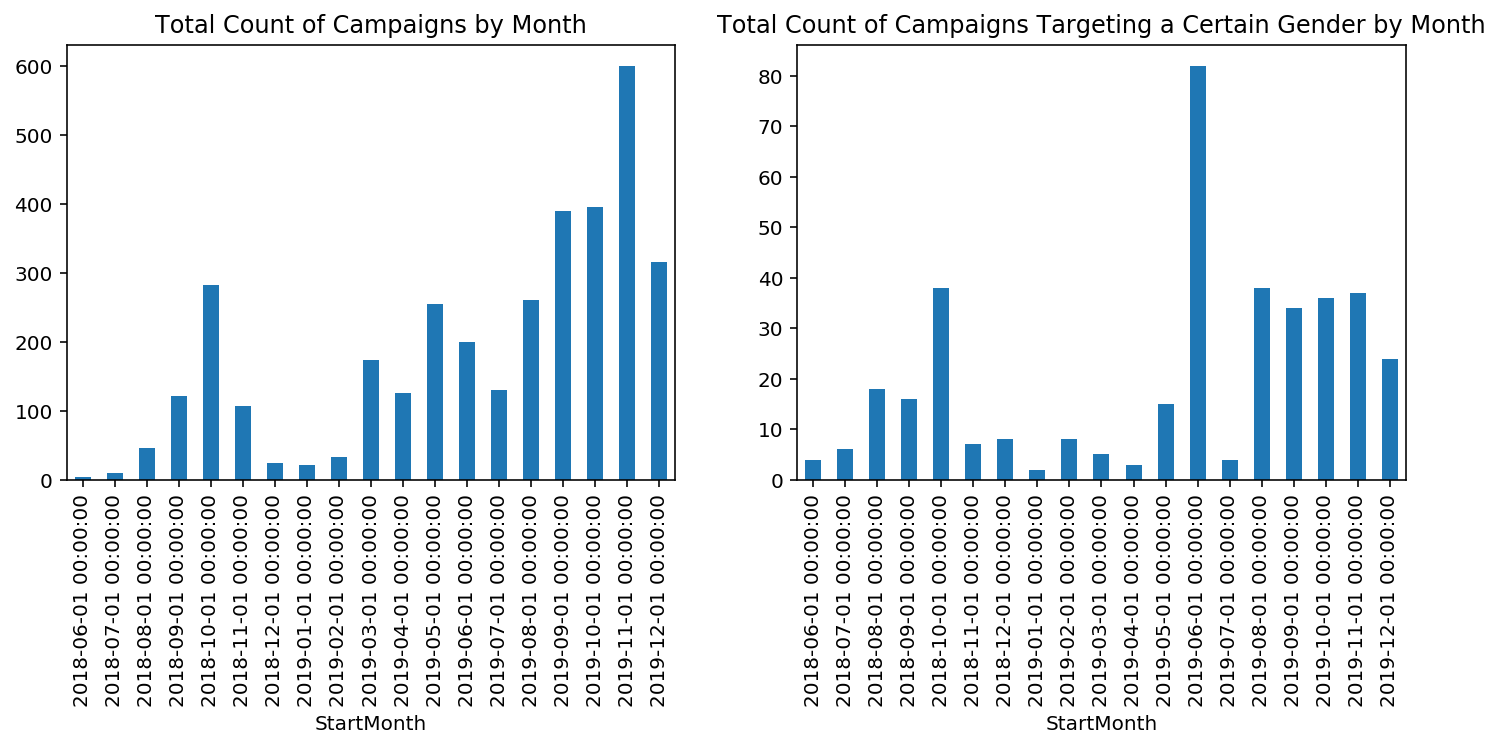

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
relevant = ads[['StartDate', 'EndDate', 'Spend', 'Currency Code', 'CountryCode', 
                'Regions (Included)', 'Regions (Excluded)', 'Language',  
                'Gender', 'AgeBracket', 'Interests', 'AdvancedDemographics']]

# Gender over time
relevant['StartMonth'] = relevant['StartDate'].dt.month.astype(str) + "/" +relevant['StartDate'].dt.year.astype(str)
relevant['StartMonth'] = pd.to_datetime(relevant['StartMonth'])
campaigns_over_time = relevant.groupby(['StartMonth'])['EndDate'].count()
campaigns_over_time.plot(kind='bar', ax = axes[0], title='Total Count of Campaigns by Month')

gender_over_time = relevant.groupby(['StartMonth', 'Gender'])['Gender'].count()
reset = gender_over_time.to_frame().rename(columns={'Gender': 'Count'}).reset_index()
by_month = reset.groupby('StartMonth')['Count'].sum().reset_index(drop=True)
plot_all_gender = reset.groupby('StartMonth')['Count'].sum()
plot_all_gender.plot(kind='bar', ax = axes[1], title = 'Total Count of Campaigns Targeting a Certain Gender by Month')

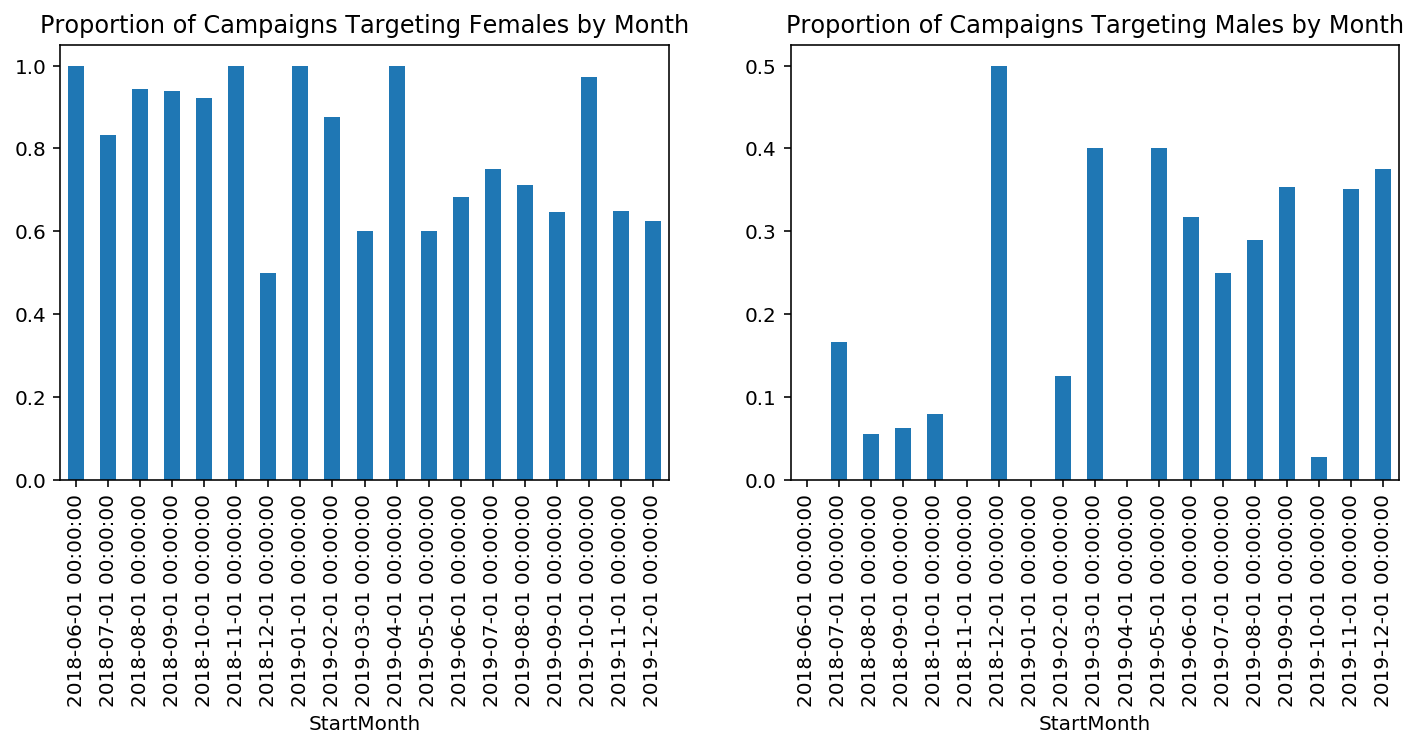

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# female proportion graph
female = reset[reset["Gender"] == "FEMALE"].reset_index(drop=True)
ts = female['Count'].copy() / by_month
ts.index = female['StartMonth']
ts.plot(kind='bar', ax = axes[0], title = 'Proportion of Campaigns Targeting Females by Month')

# male proportion graph
male = reset[reset["Gender"] == "MALE"]
by_month2 = reset.groupby('StartMonth')['Count'].sum().to_frame().reset_index()
ts2 = male.merge(by_month2, how='outer', on='StartMonth').fillna(0).sort_values(by='StartMonth')['Count_x'].reset_index(drop=True)
ts2.index = female['StartMonth']
by_month_with_date = pd.Series(by_month.values, index= female['StartMonth'])
ts2 = ts2 / by_month_with_date
ts2.plot(kind='bar', ax=axes[1], title = 'Proportion of Campaigns Targeting Males by Month')

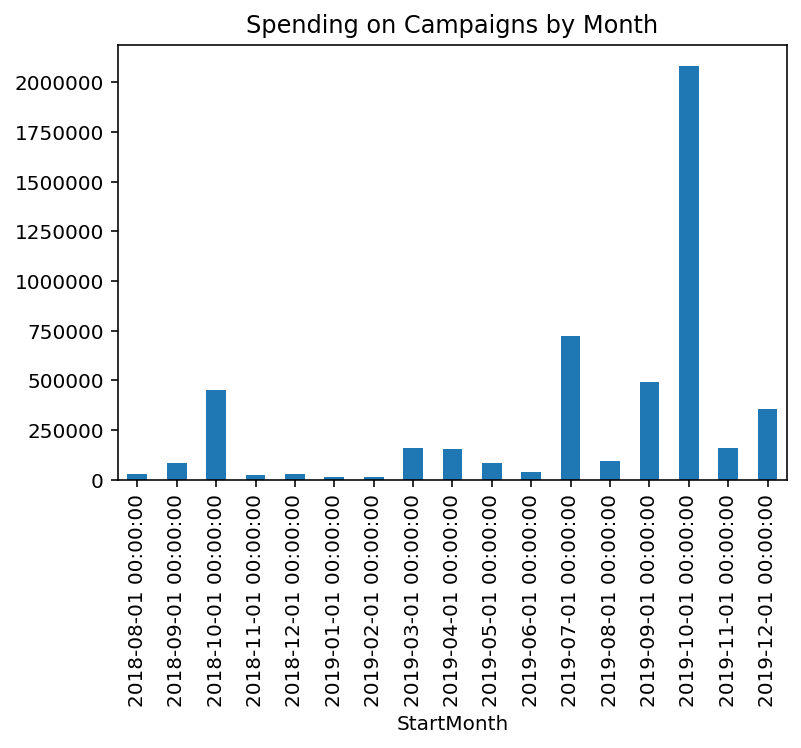

In [6]:
# spending over time
usd = relevant[relevant['Currency Code'] == "USD"]
spend_by_month = usd.groupby("StartMonth")['Spend'].sum()
spend_by_month.plot(kind="bar", title = "Spending on Campaigns by Month")

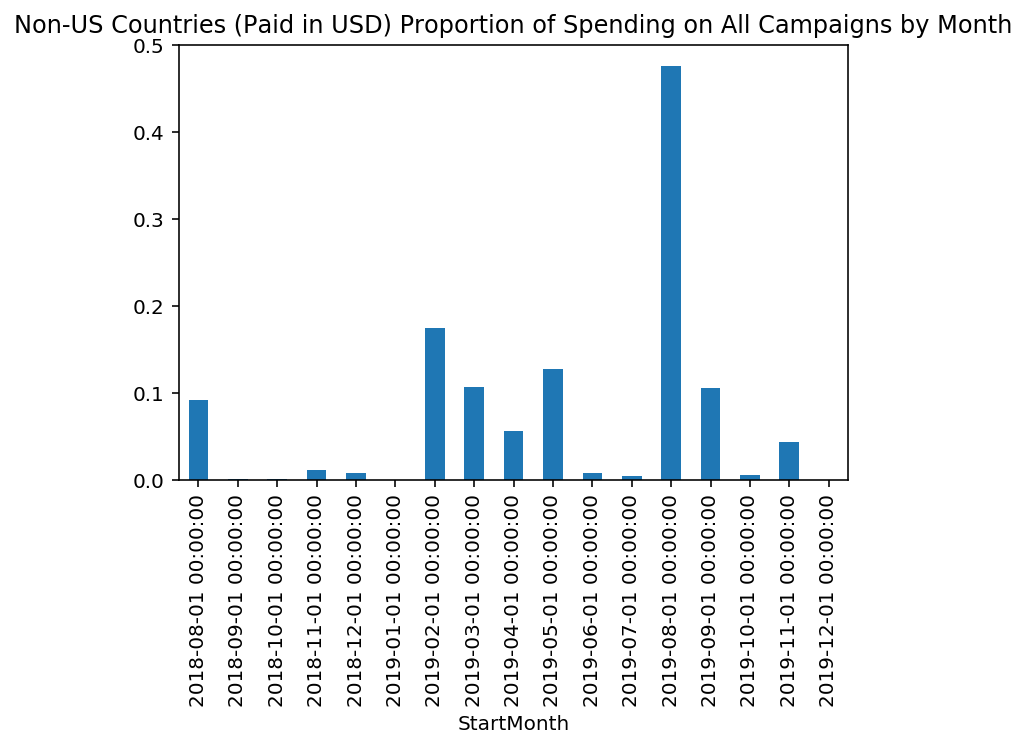

In [7]:
not_us = usd[usd['CountryCode'] != "united states"]
not_us_by_month = not_us.groupby("StartMonth")['Spend'].sum() / spend_by_month
not_us_by_month.plot(kind="bar", title = "Non-US Countries (Paid in USD) Proportion of Spending on All Campaigns by Month")

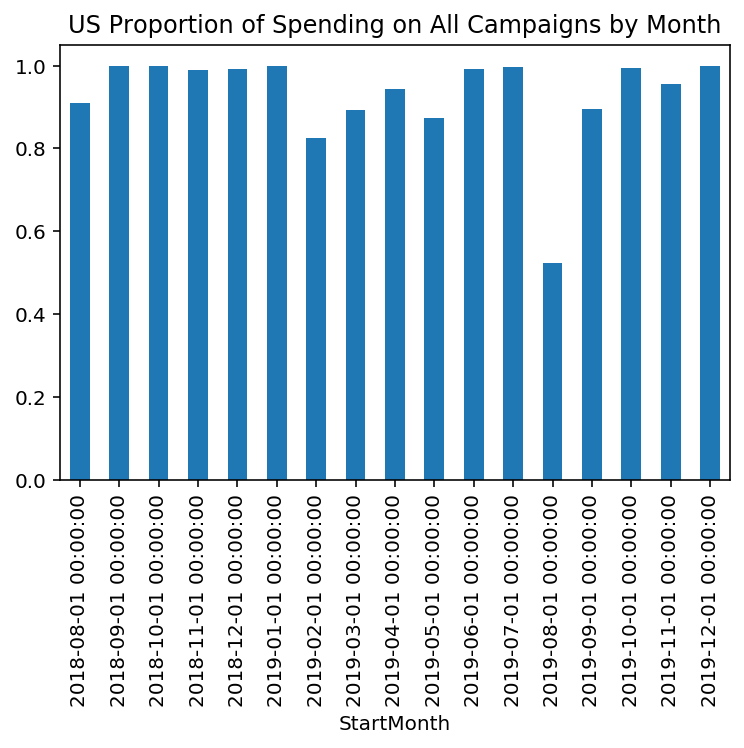

In [8]:
us = usd[usd['CountryCode'] == "united states"]
us_by_month = us.groupby("StartMonth")['Spend'].sum() / spend_by_month
us_by_month.plot(kind="bar", title = "US Proportion of Spending on All Campaigns by Month")

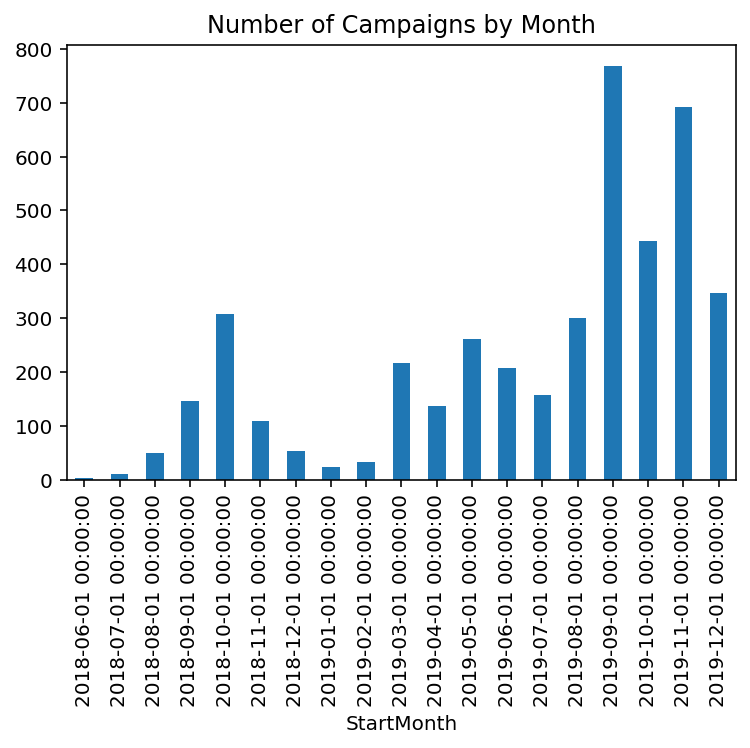

In [9]:
ads['StartMonth'] = ads['StartDate'].dt.month.astype(str) + "/" +ads['StartDate'].dt.year.astype(str)
ads['StartMonth'] = pd.to_datetime(ads['StartMonth'])
campaigns_by_month = ads.groupby('StartMonth')['ADID'].count()
campaigns_by_month.plot(kind='bar', title='Number of Campaigns by Month')

### Assessment of Missingness

#### We started by doing a cursory analysis of the dependence of columns with missingness on other columns
This helped us identify which columns were and weren't NMAR  
(Warning - Long Output)

In [22]:
# specify the column to be analyzed
missing_column = 'CandidateBallotInformation'
no_end = ads[ads[missing_column].isna()]

# for each column, calculate the following stats for the whole column and just the data in the column when the
# analyzed column is NaN
for col in ads.columns:
    
    # if the column has quantitative data, calculate the proportion missing, mean, median, max, and min
    if (ads[col].dtype == np.int64) | (ads[col].dtype == np.float64):
        print("{0} all: prop null - {1}, mean - {2}, median - {3}, max - {4}, min - {5}".format(col, ads[col].isna().sum() / 4268, ads[col].mean(), ads[col].median(), ads[col].max(), ads[col].min()))
        print("{0} null: prop null - {1}, mean - {2}, median - {3}, max - {4}, min - {5}".format(col, no_end[col].isna().sum() / no_end.shape[0], no_end[col].mean(), no_end[col].median(), no_end[col].max(), no_end[col].min()))
    
    # if the column doesn't have quantitative data, just calculate the proportion missing
    else:
        print("{0} all: prop null - {1}".format(col, ads[col].isna().sum() / 4268))  

ADID all: prop null - 0.0
CreativeUrl all: prop null - 0.0
Currency Code all: prop null - 0.0
Spend all: prop null - 0.0, mean - 1673.9714151827554, median - 197.5, max - 451244, min - 0
Spend null: prop null - 0.0, mean - 1772.718226068145, median - 206.0, max - 451244, min - 0
Impressions all: prop null - 0.0, mean - 702295.6237113402, median - 72689.5, max - 234901755, min - 1
Impressions null: prop null - 0.0, mean - 755473.5740941049, median - 80482.0, max - 234901755, min - 1
StartDate all: prop null - 0.0
EndDate all: prop null - 0.18205248359887535
OrganizationName all: prop null - 0.0
BillingAddress all: prop null - 0.0
CandidateBallotInformation all: prop null - 0.866447985004686
PayingAdvertiserName all: prop null - 0.0
Gender all: prop null - 0.9097938144329897
AgeBracket all: prop null - 0.08270852858481724
CountryCode all: prop null - 0.0
Regions (Included) all: prop null - 0.7242268041237113
Regions (Excluded) all: prop null - 0.989456419868791
Electoral Districts (Inclu

#### First Assessment of Missingness
We compared the distributions of Null and Non-Null values for CandidateBallotInformation on Currency Code.  
Test Statistic: Total Variation Distance  
P-Value: 0.0

In [24]:
# defines total variation distance for later use
def tot_var_dist(dist1, dist2):
    return np.sum(np.abs(dist1 - dist2)) / 2

p-value: 0.0


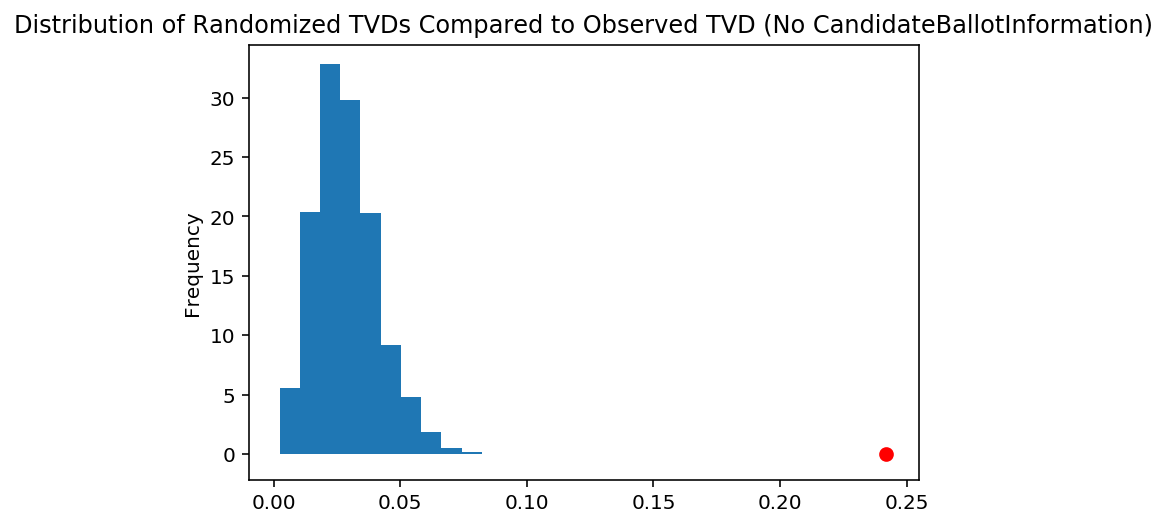

In [27]:
# specifies the columns for analyzing dependence
missing = 'CandidateBallotInformation'
depend = 'Currency Code'

# gets the proportions of currency codes for campaigns with missing CandidateBallotInformation
no_end = ads[ads[missing].isna()]
no_end_dist = no_end.groupby(depend)['ADID'].count() / no_end['ADID'].count()

# gets the proportions of currency codes for campaigns with valid CandidateBallotInformation values
all_ends = ads[ads[missing].notna()]
all_ends_dist = all_ends.groupby(depend)['ADID'].count() / all_ends['ADID'].count()

# calculates observed tvd
observed = tot_var_dist(no_end_dist, all_ends_dist)

# running randomized tests
ads['missing_na'] = ads[missing].isna()
N =1000
tvds = []
for i in range(N):
    
    # shuffles CandidateBallotInformation null values
    shuffled_ends = (ads['missing_na'].sample(replace=False, frac=1).reset_index(drop=True))
    shuffled = (ads[[depend]].reset_index(drop=True).assign(**{'Shuffled Missing': shuffled_ends}))
    
    # gets the proportions of currency codes where shuffled CandidateBallotInformation is null
    no_end = shuffled[shuffled['Shuffled Missing'] == False]
    no_end_dist = no_end.groupby(depend)['Shuffled Missing'].count() / no_end['Shuffled Missing'].count()
    
    # gets the proportions of currency codes where shuffled CandidateBallotInformation is not null
    all_ends = shuffled[shuffled['Shuffled Missing']==True]
    all_ends_dist = all_ends.groupby(depend)['Shuffled Missing'].count() / all_ends['Shuffled Missing'].count()
    
    # calculates test tvd
    tvd = tot_var_dist(no_end_dist, all_ends_dist)
    tvds.append(tvd)

# plot tvd distribution
pd.Series(tvds).plot(kind='hist', density=True, title="Distribution of Randomized TVDs Compared to Observed TVD (No CandidateBallotInformation)")
plt.scatter(observed, 0, color='red', s = 40);

# calculate p-value
p_val = np.count_nonzero(tvds >= observed)/ N
print("p-value: {}".format(p_val))

#### Second Assessment of Missingness
We compared the distributions of Null and Non-Null values for CandidateBallotInformation on Radius Targeting (Included).  
Test Statistic: Total Variation Distance  
P-Value: ~0.34

p-value: 0.363


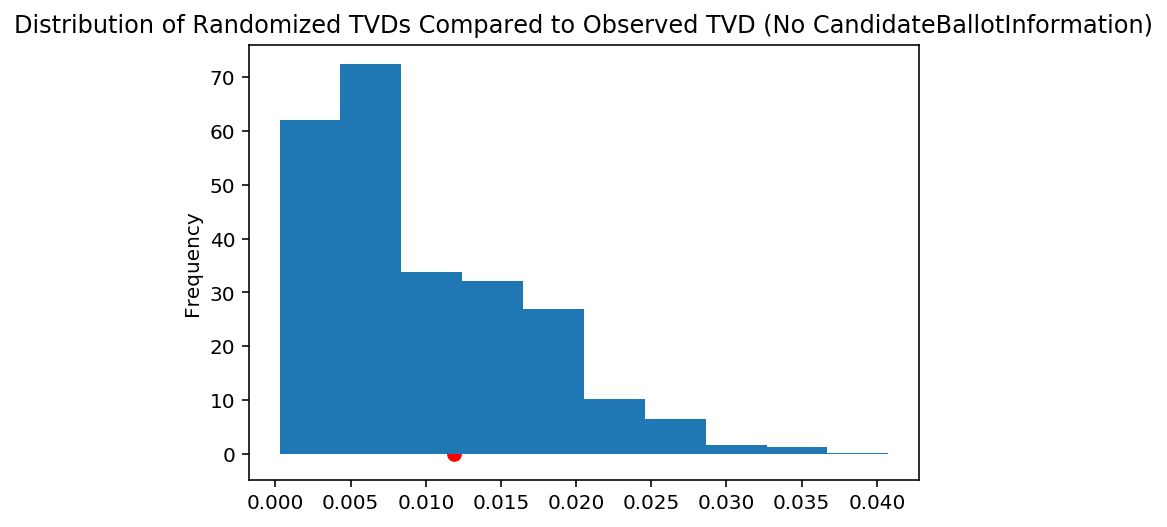

In [30]:
# specifies the columns for analyzing dependence
missing = 'CandidateBallotInformation'
depend = 'Radius Targeting (Included)'

# gets the data where CandidateBallotInformation is missing
val_missing = ads[ads[missing].isna()].copy()

# gets the proportions where Radius Targeting (Included) is and isn't missing
prop_null = val_missing[depend].isna().sum() / val_missing.shape[0]
prop_not_null = val_missing[depend].notna().sum() / val_missing.shape[0]
null_series = pd.Series([prop_null, prop_not_null])

# gets the data where CandidateBallotInformation isn't missing
val_missing = ads[ads[missing].notna()].copy()

# gets the proportions where Radius Targeting (Included) is and isn't missing
prop_null = val_missing[depend].isna().sum() / val_missing.shape[0]
prop_not_null = val_missing[depend].notna().sum() / val_missing.shape[0]
specified_series = pd.Series([prop_null, prop_not_null])

# calculate observed tvd
observed = tot_var_dist(null_series, specified_series)

# running randomized tests
N = 1000
results = []
relevant = ads.copy()
for _ in range(N):
    
    # shuffle CandidateBallotInformation
    shuffled_col = (
        relevant[depend]
        .sample(replace=False, frac=1)
        .reset_index(drop=True)
    )
    shuffled = (
        relevant
        .assign(**{
            'shuffled': shuffled_col,
        })
    )
    
    # gets the data where CandidateBallotInformation is missing
    val_missing = shuffled[shuffled[missing].isna()].copy()
    
    # gets the proportions where Radius Targeting (Included) is and isn't missing
    prop_null = val_missing['shuffled'].isna().sum() / val_missing.shape[0]
    prop_not_null = val_missing['shuffled'].notna().sum() / val_missing.shape[0]
    null_series = pd.Series([prop_null, prop_not_null])
    
    # gets the data where CandidateBallotInformation isn't missing
    val_missing = shuffled[shuffled[missing].notna()].copy()
    
    # gets the proportions where Radius Targeting (Included) is and isn't missing
    prop_null = val_missing['shuffled'].isna().sum() / val_missing.shape[0]
    prop_not_null = val_missing['shuffled'].notna().sum() / val_missing.shape[0]
    specified_series = pd.Series([prop_null, prop_not_null])
    
    # calculates test tvd
    results.append(tot_var_dist(null_series, specified_series))

# plot tvd distribution
pd.Series(results).plot(kind='hist', density=True, title="Distribution of Randomized TVDs Compared to Observed TVD (No CandidateBallotInformation)")
plt.scatter(observed, 0, color='red', s = 40);

# calculate p-value
p_val = np.count_nonzero(results >= observed)/ N
print("p-value: {}".format(p_val))

### Hypothesis Test

#### Question: for campaigns paid in USD, what is the difference between the average spend for campaigns where the end date is missing compared to the average spend for all campaigns?
Test statistic: Mean  
P-Value: 0.0 - see the plot below for distribution

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


p-value: 0.0


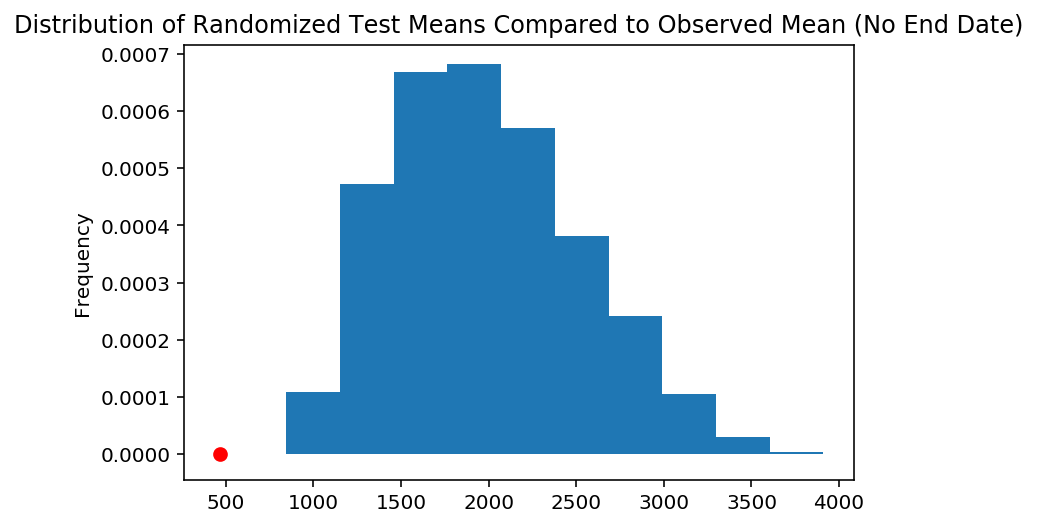

In [15]:
# data where campaigns are paid in USD
all_ends = ads[ads['Currency Code'] == 'USD']
all_ends['end_na'] = all_ends['EndDate'].isna()

# data where the campaigns have no specified end date and are paid in USD
no_end = all_ends[all_ends['EndDate'].isna()]

# calculate observed statistic
observed = no_end['Spend'].mean()

# running randomized tests
N = 1000
means = []
for i in range(N):
    
    # shuffles the end column
    shuffled_ends = (all_ends['end_na'].sample(replace=False, frac=1).reset_index(drop=True))
    shuffled = (all_ends[['Spend']].reset_index(drop=True).assign(**{'Shuffled EndDate': shuffled_ends}))
    
    # calculates and saves the test statistic
    na_mean = (shuffled.groupby('Shuffled EndDate').agg({'Spend':'mean'}).loc[True]['Spend'])
    means.append(na_mean)


# plot mean distribution
pd.Series(means).plot(kind='hist', density=True, title="Distribution of Randomized Test Means Compared to Observed Mean (No End Date)")
plt.scatter(observed, 0, color='red', s = 40);

# calculate p-value
p_val = np.count_nonzero(means <= observed)/ N
print("p-value: {}".format(p_val))



#### Question: is there any difference between the distribution of specified gender-targeted campaigns where the campaign end date is missing compared to the distribution of specified gender-targeted campaigns for all campaigns?
(Used a permutation test)  
Test statistic: Total Variation Distance  
P-Value: 0.0 - see the plot below for distribution

p-value: 0.0


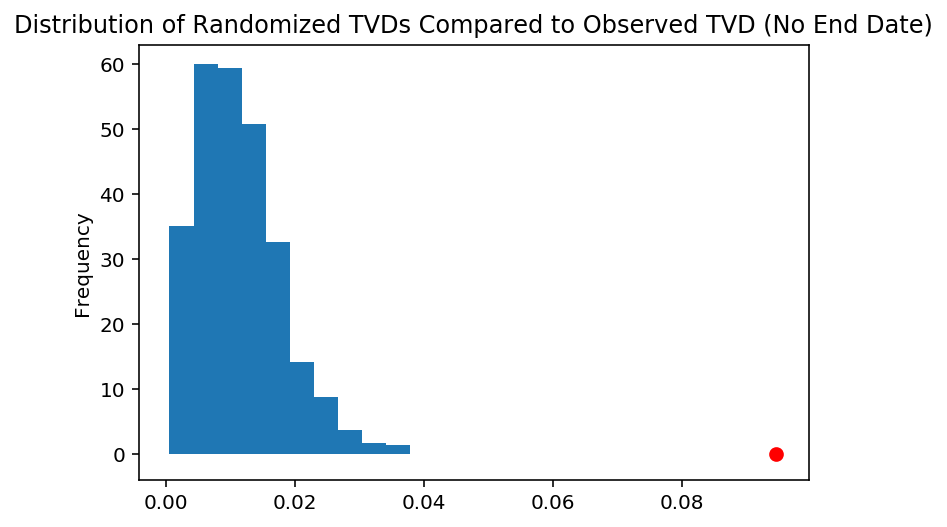

In [18]:
# calculates gender proportions for campaigns without a specified end date
no_end = ads[ads['EndDate'].isna()]
no_end_dist = no_end.groupby('Gender')['ADID'].count() / no_end['ADID'].count()
dict_vers = no_end_dist.to_dict()
dict_vers['Null'] = no_end['Gender'].isna().sum()/no_end.shape[0]
no_end_dist = pd.Series(dict_vers)

# calculates gender proportions for campaigns with a specified end date
all_ends = ads[ads['EndDate'].notna()]
all_ends_dist = all_ends.groupby('Gender')['ADID'].count() / all_ends['ADID'].count()
dict_vers = all_ends_dist.to_dict()
dict_vers['Null'] = all_ends['Gender'].isna().sum()/all_ends.shape[0]
all_ends_dist = pd.Series(dict_vers)

# calculates observed tvd
observed = tot_var_dist(no_end_dist, all_ends_dist)

# running randomized tests
ads['end_na'] = ads['EndDate'].isna()
N = 1000
tvds = []
for i in range(N):
    
    # shuffles the end column
    shuffled_ends = (ads['end_na'].sample(replace=False, frac=1).reset_index(drop=True))
    shuffled = (ads[['Gender']].reset_index(drop=True).assign(**{'Shuffled EndDate': shuffled_ends}))
    
    # calculates gender proportions for campaigns without a specified end date
    no_end = shuffled[shuffled['Shuffled EndDate'] == False]
    no_end_dist = no_end.groupby('Gender')['Shuffled EndDate'].count() / no_end['Shuffled EndDate'].count()
    dict_vers = no_end_dist.to_dict()
    dict_vers['Null'] = no_end['Gender'].isna().sum()/no_end.shape[0]
    no_end_dist = pd.Series(dict_vers)
    
    # calculates gender proportions for campaigns with a specified end date
    all_ends = shuffled[shuffled['Shuffled EndDate']==True]
    all_ends_dist = all_ends.groupby('Gender')['Shuffled EndDate'].count() / all_ends['Shuffled EndDate'].count()
    dict_vers = all_ends_dist.to_dict()
    dict_vers['Null'] = all_ends['Gender'].isna().sum()/all_ends.shape[0]
    all_ends_dist = pd.Series(dict_vers)
    
    # calculates test statistic
    tvd = tot_var_dist(no_end_dist, all_ends_dist)
    tvds.append(tvd)

# plot tvd distribution
pd.Series(tvds).plot(kind='hist', density=True, title="Distribution of Randomized TVDs Compared to Observed TVD (No End Date)")
plt.scatter(observed, 0, color='red', s = 40);

# calculate p-value
p_val = np.count_nonzero(tvds >= observed)/ N
print("p-value: {}".format(p_val))